# Understand the behavior of number of the shots and simulator

Since the number of the shots from the simulator play role in the accuracy and the expressibilty, we want to further study the effect of the those parameters. 

In this document, we will only focus on the arbitary circuit since it should give identical result with the harr distribution.

In [45]:
from matplotlib import pyplot
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt

from scipy.special import rel_entr
from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-03-21 00:35:02,909: Credentials are already in use. The existing account in the session will be replaced.


In [46]:

#Possible Bin
bins_list=[];
for i in range(76):
    bins_list.append((i)/75)
#Center of the Bean
bins_x=[]    
for i in range(75):
    bins_x.append(bins_list[1]+bins_list[i])
def P_harr(l,u,N):
    return (1-l)**(N-1)-(1-u)**(N-1)
#Harr historgram
P_harr_hist=[]
for i in range(75):
    P_harr_hist.append(P_harr(bins_list[i],bins_list[i+1],2))    
#Imaginary    
j=(-1)**(1/2)

## Arbitary Unitary Qasm_simulator

In [55]:
backend = Aer.get_backend('qasm_simulator')
for x in range(1,20,1):
    print()
arr = []
for nsh in range(1,20,1):
    arr.append([])
    for lp in range(1,10,1):
        nshot=int(round(1000*(nsh)**1.5,0))
        nparam=1000*lp
        fidelity=[]    
        for x in range(nparam):
            qr = QuantumRegister(1)
            cr = ClassicalRegister(1)
            qc = QuantumCircuit(qr, cr)

            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )
            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )

            qc.measure(qr[0],cr[0])
            job = execute(qc, backend, shots=nshot)
            result = job.result()
            count =result.get_counts()

            if '0' in count and '1' in count:
                ratio=count['0']/nshot
            elif '0' in count and '1' not in count:
                ratio=count['0']/nshot
            else:
                ratio=0

            fidelity.append(ratio)   
            #Kullback Leibler divergence
        weights = np.ones_like(fidelity)/float(len(fidelity))            
        P_U_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0];
        #Kullback Leibler divergence
        print(nshot,'shots per simulation',nparam,'distribution size')
        arr[nsh-1].append(sum(rel_entr(P_U_hist, P_harr_hist)))





















1000 shots per simulation 1000 distribution size
1000 shots per simulation 2000 distribution size
1000 shots per simulation 3000 distribution size
1000 shots per simulation 4000 distribution size
1000 shots per simulation 5000 distribution size
1000 shots per simulation 6000 distribution size
1000 shots per simulation 7000 distribution size
1000 shots per simulation 8000 distribution size
1000 shots per simulation 9000 distribution size
2828 shots per simulation 1000 distribution size
2828 shots per simulation 2000 distribution size
2828 shots per simulation 3000 distribution size
2828 shots per simulation 4000 distribution size
2828 shots per simulation 5000 distribution size
2828 shots per simulation 6000 distribution size
2828 shots per simulation 7000 distribution size
2828 shots per simulation 8000 distribution size
2828 shots per simulation 9000 distribution size
5196 shots per simulation 1000 distribution size
5196 shots per simulation 2000 distribution size
5

82819 shots per simulation 4000 distribution size
82819 shots per simulation 5000 distribution size
82819 shots per simulation 6000 distribution size
82819 shots per simulation 7000 distribution size
82819 shots per simulation 8000 distribution size
82819 shots per simulation 9000 distribution size


In [142]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [147]:
np.savetxt("KLDivg_qasm.txt",qasm)

In [ ]:
qasm

## QASM Density matrix Simulator

In [148]:
backend = QasmSimulator(method='density_matrix')

for x in range(1,20,1):
    print()
arr = []
for nsh in range(1,20,1):
    arr.append([])
    for lp in range(1,10,1):
        nshot=int(round(1000*(nsh)**1.5,0))
        nparam=1000*lp
        fidelity=[]    
        for x in range(nparam):
            qr = QuantumRegister(1)
            cr = ClassicalRegister(1)
            qc = QuantumCircuit(qr, cr)

            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )
            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )

            qc.measure(qr[0],cr[0])
            job = execute(qc, backend, shots=nshot)
            result = job.result()
            count =result.get_counts()

            if '0' in count and '1' in count:
                ratio=count['0']/nshot
            elif '0' in count and '1' not in count:
                ratio=count['0']/nshot
            else:
                ratio=0

            fidelity.append(ratio)   
            #Kullback Leibler divergence
        weights = np.ones_like(fidelity)/float(len(fidelity))            
        P_U_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0];
        #Kullback Leibler divergence
        
        arr[nsh-1].append(sum(rel_entr(P_U_hist, P_harr_hist)))
        print(nshot,'shots per simulation',nparam,'distribution size KL=',sum(rel_entr(P_U_hist, P_harr_hist)))
import sys
import numpy
density_mat=arr
numpy.set_printoptions(threshold=sys.maxsize)
np.savetxt("KLDivg_density_mat.txt",density_mat)




















1000 shots per simulation 1000 distribution size KL= 0.03564651826447743
1000 shots per simulation 2000 distribution size KL= 0.020871102437088698
1000 shots per simulation 3000 distribution size KL= 0.009621353668631927
1000 shots per simulation 4000 distribution size KL= 0.009409601203997454
1000 shots per simulation 5000 distribution size KL= 0.006308746387662668
1000 shots per simulation 6000 distribution size KL= 0.005914831900824758
1000 shots per simulation 7000 distribution size KL= 0.006392087084269407
1000 shots per simulation 8000 distribution size KL= 0.00425165359584873
1000 shots per simulation 9000 distribution size KL= 0.004147983412343955
2828 shots per simulation 1000 distribution size KL= 0.044086933045103055
2828 shots per simulation 2000 distribution size KL= 0.019135812431900247
2828 shots per simulation 3000 distribution size KL= 0.010911141365261171
2828 shots per simulation 4000 distribution size KL= 0.009132750717624025
2828 shots per simula

46872 shots per simulation 3000 distribution size KL= 0.01086011589451763
46872 shots per simulation 4000 distribution size KL= 0.009510903150504617
46872 shots per simulation 5000 distribution size KL= 0.008768308271919932
46872 shots per simulation 6000 distribution size KL= 0.004751058694676031
46872 shots per simulation 7000 distribution size KL= 0.005070110092897409
46872 shots per simulation 8000 distribution size KL= 0.00341172062922741
46872 shots per simulation 9000 distribution size KL= 0.0042574841839134675
52383 shots per simulation 1000 distribution size KL= 0.03320466567744195
52383 shots per simulation 2000 distribution size KL= 0.025521166076559115
52383 shots per simulation 3000 distribution size KL= 0.010685522660736746
52383 shots per simulation 4000 distribution size KL= 0.007172840693268035
52383 shots per simulation 5000 distribution size KL= 0.006849285528301366
52383 shots per simulation 6000 distribution size KL= 0.005020445611424899
52383 shots per simulation 

In [149]:
density_mat

[[0.03564651826447743,
  0.020871102437088698,
  0.009621353668631927,
  0.009409601203997454,
  0.006308746387662668,
  0.005914831900824758,
  0.006392087084269407,
  0.00425165359584873,
  0.004147983412343955],
 [0.044086933045103055,
  0.019135812431900247,
  0.010911141365261171,
  0.009132750717624025,
  0.011456244793761339,
  0.007954516335748306,
  0.005548031200585661,
  0.0050854230510299575,
  0.00401078400764941],
 [0.03571895502509018,
  0.01682436611800507,
  0.010786138672289785,
  0.010828746473646397,
  0.006992614425849317,
  0.007279571587854724,
  0.00414776126880919,
  0.003739961405752186,
  0.005486135115020914],
 [0.039476734955802395,
  0.016409300080272506,
  0.008200923235182732,
  0.011516938807969914,
  0.00694654376979589,
  0.005264497436269632,
  0.004612729335821585,
  0.005112412943663227,
  0.003404652782912028],
 [0.04130876079127352,
  0.016851668610049983,
  0.01390260895799241,
  0.012257138489260268,
  0.005894233544851029,
  0.0046555763553917

## StateVector

In [ ]:
backend = QasmSimulator(method='statevector')

for x in range(1,20,1):
    print()
arr = []
for nsh in range(1,20,1):
    arr.append([])
    for lp in range(1,10,1):
        nshot=int(round(1000*(nsh)**1.5,0))
        nparam=1000*lp
        fidelity=[]    
        for x in range(nparam):
            qr = QuantumRegister(1)
            cr = ClassicalRegister(1)
            qc = QuantumCircuit(qr, cr)

            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )
            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )

            qc.measure(qr[0],cr[0])
            job = execute(qc, backend, shots=nshot)
            result = job.result()
            count =result.get_counts()

            if '0' in count and '1' in count:
                ratio=count['0']/nshot
            elif '0' in count and '1' not in count:
                ratio=count['0']/nshot
            else:
                ratio=0

            fidelity.append(ratio)   
            #Kullback Leibler divergence
        weights = np.ones_like(fidelity)/float(len(fidelity))            
        P_U_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0];
        #Kullback Leibler divergence
        
        arr[nsh-1].append(sum(rel_entr(P_U_hist, P_harr_hist)))
        print(nshot,'shots per simulation',nparam,'distribution size KL=',sum(rel_entr(P_U_hist, P_harr_hist)))
import sys
import numpy
statevector1=arr
numpy.set_printoptions(threshold=sys.maxsize)
np.savetxt("KLDivg_statevector.txt",statevector1)




















1000 shots per simulation 1000 distribution size KL= 0.04287068603217999
1000 shots per simulation 2000 distribution size KL= 0.01414771637344878
1000 shots per simulation 3000 distribution size KL= 0.013004117460274255
1000 shots per simulation 4000 distribution size KL= 0.010787561104774582
1000 shots per simulation 5000 distribution size KL= 0.00791017199446588
1000 shots per simulation 6000 distribution size KL= 0.004785621029812685
1000 shots per simulation 7000 distribution size KL= 0.006413091929208285
1000 shots per simulation 8000 distribution size KL= 0.00590509664591104
1000 shots per simulation 9000 distribution size KL= 0.0034778736726820557
2828 shots per simulation 1000 distribution size KL= 0.044603251972311485
2828 shots per simulation 2000 distribution size KL= 0.0170459702794827
2828 shots per simulation 3000 distribution size KL= 0.015792283131241265
2828 shots per simulation 4000 distribution size KL= 0.009434541533006498
2828 shots per simulatio

46872 shots per simulation 3000 distribution size KL= 0.011179296126252965
46872 shots per simulation 4000 distribution size KL= 0.008166118107717392
46872 shots per simulation 5000 distribution size KL= 0.00716230214304284
46872 shots per simulation 6000 distribution size KL= 0.006415164948565989
46872 shots per simulation 7000 distribution size KL= 0.004673797775086431


In [ ]:
statevector1

## stabilizer

In [ ]:
backend = QasmSimulator(method='stabilizer')

for x in range(1,20,1):
    print()
arr = []
for nsh in range(1,20,1):
    arr.append([])
    for lp in range(1,10,1):
        nshot=int(round(1000*(nsh)**1.5,0))
        nparam=1000*lp
        fidelity=[]    
        for x in range(nparam):
            qr = QuantumRegister(1)
            cr = ClassicalRegister(1)
            qc = QuantumCircuit(qr, cr)

            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )
            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )

            qc.measure(qr[0],cr[0])
            job = execute(qc, backend, shots=nshot)
            result = job.result()
            count =result.get_counts()

            if '0' in count and '1' in count:
                ratio=count['0']/nshot
            elif '0' in count and '1' not in count:
                ratio=count['0']/nshot
            else:
                ratio=0

            fidelity.append(ratio)   
            #Kullback Leibler divergence
        weights = np.ones_like(fidelity)/float(len(fidelity))            
        P_U_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0];
        #Kullback Leibler divergence
        
        arr[nsh-1].append(sum(rel_entr(P_U_hist, P_harr_hist)))
        print(nshot,'shots per simulation',nparam,'distribution size KL=',sum(rel_entr(P_U_hist, P_harr_hist)))
import sys
import numpy
stabilizer1=arr
numpy.set_printoptions(threshold=sys.maxsize)
np.savetxt("KLDivg_stabilizer.txt",stabilizer1)

In [ ]:
stabilizer1

## extended_stabilizer

In [ ]:
backend = QasmSimulator(method='extended_stabilizer')

for x in range(1,20,1):
    print()
arr = []
for nsh in range(1,20,1):
    arr.append([])
    for lp in range(1,10,1):
        nshot=int(round(1000*(nsh)**1.5,0))
        nparam=1000*lp
        fidelity=[]    
        for x in range(nparam):
            qr = QuantumRegister(1)
            cr = ClassicalRegister(1)
            qc = QuantumCircuit(qr, cr)

            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )
            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )

            qc.measure(qr[0],cr[0])
            job = execute(qc, backend, shots=nshot)
            result = job.result()
            count =result.get_counts()

            if '0' in count and '1' in count:
                ratio=count['0']/nshot
            elif '0' in count and '1' not in count:
                ratio=count['0']/nshot
            else:
                ratio=0

            fidelity.append(ratio)   
            #Kullback Leibler divergence
        weights = np.ones_like(fidelity)/float(len(fidelity))            
        P_U_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0];
        #Kullback Leibler divergence
        
        arr[nsh-1].append(sum(rel_entr(P_U_hist, P_harr_hist)))
        print(nshot,'shots per simulation',nparam,'distribution size KL=',sum(rel_entr(P_U_hist, P_harr_hist)))
import sys
import numpy
extended_stabilizer1=arr
numpy.set_printoptions(threshold=sys.maxsize)
np.savetxt("KLDivg_extended_stabilizer.txt",extended_stabilizer1)

In [ ]:
extended_stabilizer1

## matrix_product_state

In [ ]:
backend = QasmSimulator(method='matrix_product_state')

for x in range(1,20,1):
    print()
arr = []
for nsh in range(1,20,1):
    arr.append([])
    for lp in range(1,10,1):
        nshot=int(round(1000*(nsh)**1.5,0))
        nparam=1000*lp
        fidelity=[]    
        for x in range(nparam):
            qr = QuantumRegister(1)
            cr = ClassicalRegister(1)
            qc = QuantumCircuit(qr, cr)

            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )
            u13=UnitaryGate(random_unitary(2))
            qc.append(u13, [qr[0]] )

            qc.measure(qr[0],cr[0])
            job = execute(qc, backend, shots=nshot)
            result = job.result()
            count =result.get_counts()

            if '0' in count and '1' in count:
                ratio=count['0']/nshot
            elif '0' in count and '1' not in count:
                ratio=count['0']/nshot
            else:
                ratio=0

            fidelity.append(ratio)   
            #Kullback Leibler divergence
        weights = np.ones_like(fidelity)/float(len(fidelity))            
        P_U_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0];
        #Kullback Leibler divergence
        
        arr[nsh-1].append(sum(rel_entr(P_U_hist, P_harr_hist)))
        print(nshot,'shots per simulation',nparam,'distribution size KL=',sum(rel_entr(P_U_hist, P_harr_hist)))
import sys
import numpy
matrix_product1=arr
numpy.set_printoptions(threshold=sys.maxsize)
np.savetxt("KLDivg_matrix_product1.txt",matrix_product1)

In [ ]:
matrix_product1

In [133]:
def plotdata(i,data):
    klll=np.transpose(data)
    x=[];
    y=[];
    for nsh in range(0,9,1):
        x.append(int(round(1000*(nsh)**1.5,0)))
        y.append(klll[nsh][i])
    return [x,y]

## QASM simulator

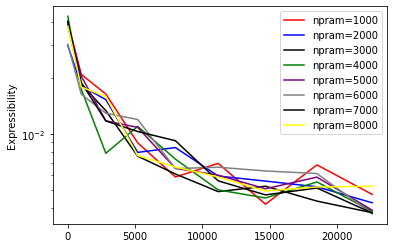

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

#loading dataset

data=qasm;
plt.plot(plotdata(0,data)[0],plotdata(0,data)[1], color='red', label='npram=1000');
plt.plot(plotdata(1,data)[0],plotdata(1,data)[1], color='blue', label='npram=2000');
plt.plot(plotdata(2,data)[0],plotdata(2,data)[1], color='black', label='npram=3000');
plt.plot(plotdata(3,data)[0],plotdata(3,data)[1], color='green', label='npram=4000');
plt.plot(plotdata(4,data)[0],plotdata(4,data)[1], color='purple',  label='npram=5000');
plt.plot(plotdata(5,data)[0],plotdata(5,data)[1], color='gray',  label='npram=6000');
plt.plot(plotdata(6,data)[0],plotdata(6,data)[1], color='black',  label='npram=7000');
plt.plot(plotdata(7,data)[0],plotdata(7,data)[1], color='yellow',  label='npram=8000');
plt.plot(plotdata(8,data)[0],plotdata(8,data)[1], color='pink',  label='npram=9000');


plt.legend(loc='upper right')
plt.title('QASM simulator')
plt.yscale('log',base=10) 
plt.ylabel('Expressibility')

# Create names on the x axis

plt.show()